# Weather Sampling


### Temperature: 
### Input: 
compiled weather data (regionally) 
ftp://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/

### Output: 
PDF: per month sample of average temperature
sampling technique {given point, what is the probability of getting it}


http://www.pyrunner.com/weblog/2015/12/08/basic-statistics-and-timeseries-pandas/



In [2]:
import pandas as pd
import numpy as np
import os
from os.path import dirname
import matplotlib.pyplot as plt
import seaborn as sns

# absolute directory
d = os.path.dirname(os.getcwd())

# relative directory
file_path = "/test_dataset/data/generated_data.csv"


In [35]:
df = pd.read_csv(d + file_path)
df.head()

,Unnamed: 0,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Latitude,Longitude,Altitude,Datetime,Speed,Coordinates,Elevation,Temperature
0,0,00243.ppm,39,39,6,5,34,34,0,54.480866,7.578818,NaN,1543329550,82.913075,"(54.48086620605899, 7.578818052368505)",0.0,17.486141
1,1,00252.ppm,51,52,6,6,46,47,0,51.493265,10.800412,NaN,1532410001,9.677593,"(51.49326514672695, 10.800412416212342)",174.0,23.833012
2,2,00403.ppm,43,44,5,5,38,39,0,46.945466,13.607162,NaN,1550659327,25.093418,"(46.94546628976531, 13.607161934739734)",1149.5,9.844090
3,3,00579.ppm,37,37,6,6,32,32,0,46.866749,11.330575,NaN,1547868759,69.967253,"(46.86674861109444, 11.330575373668069)",1740.5,-3.884125
4,4,00675.ppm,45,47,5,5,40,42,0,48.647362,12.823384,NaN,1541485821,53.391824,"(48.647361922152896, 12.823383786489417)",377.5,-11.383144


In [100]:
# Merge files in the repo => ONLY NECESSARY ONCE

def create_compiled_file(file_path, header_line, data_type):
    filenames = list()
    with open(d + file_path + "compiled_" + data_type + ".csv", 'w') as outfile:
        outfile.write(header_line)
        for file in os.listdir(d + file_path):
            if file.endswith(".txt"):
                with open(d + file_path+file) as infile:
                    for line in infile:
                        l = line.replace(' ', "")
                        outfile.write(l)
    outfile.close()
                        


header_line = "Jahr;Monat;Brandenburg/Berlin;Brandenburg;Baden-Wuerttemberg;Bayern;Hessen;Mecklenburg-Vorpommern;Niedersachsen;Niedersachsen/Hamburg/Bremen;Nordrhein-Westfalen;Rheinland-Pfalz;Schleswig-Holstein;Saarland;Sachsen;Sachsen-Anhalt;Thueringen/Sachsen-Anhalt;Thueringen;Deutschland;" + "\n"                
file_path = "/test_dataset/weather_data/regional_average_air_temp/"
create_compiled_file(file_path, header_line, data_type="air_temp")


file_path = "/test_dataset/weather_data/regional_average_monthly_precipitation/"
create_compiled_file(file_path, header_line, data_type="precip")






# PDF by region and sampling month

b'Skipping line 1383: expected 20 fields, saw 39\n'


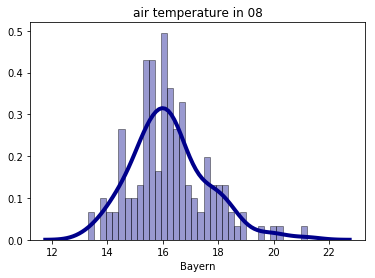

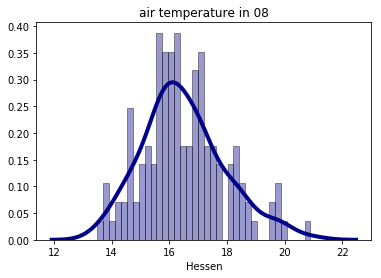

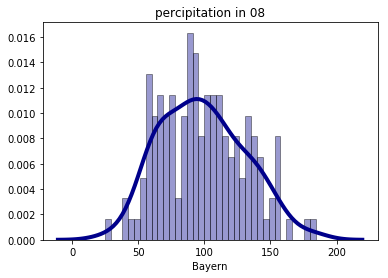

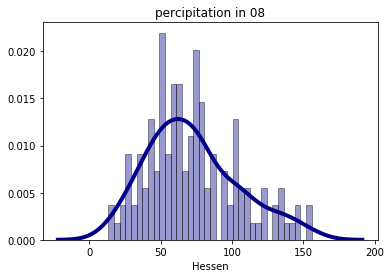

In [3]:
temperature_data_path = "/test_dataset/weather_data/regional_average_air_temp/compiled_air_temp.csv"
path = d+temperature_data_path
df_temperature = pd.read_csv(path, sep=';', error_bad_lines=False)


precip_data_path = "/test_dataset/weather_data/regional_average_monthly_precipitation/compiled_precip.csv"
path = d+precip_data_path
df_percip = pd.read_csv(path, sep=';', error_bad_lines=False)



def get_monthly_samples_by_region(df_type, month, region_name, title):
    df_subsample = df_type.loc[df_type['Monat'] == month]
    tips = sns.load_dataset("tips")
    sns.distplot(pd.to_numeric(df_subsample[region_name]), hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set_title(title + " in " + month)
    plt.show()
    

## TEMPERATURE PROFILES
get_monthly_samples_by_region(df_temperature, "08", "Bayern", "air temperature")
get_monthly_samples_by_region(df_temperature, "08", "Hessen",  "air temperature")

## PERCIPITATION PROFILES
get_monthly_samples_by_region(df_percip, "08", "Bayern", "percipitation")
get_monthly_samples_by_region(df_percip, "08", "Hessen", "percipitation")

## add rejection sampling 




